# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [4]:
image = plt.imread('data/ejer_kmeans.png')
image.shape

(764, 1499, 3)

Muestra la imagen para ver que se ha cargado bien

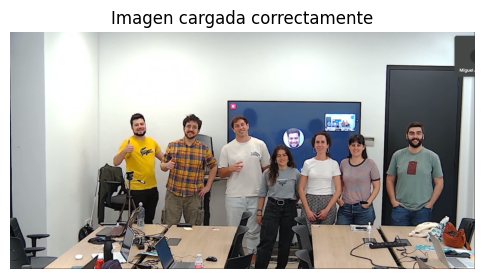

Forma de la imagen: (764, 1499, 3)


In [7]:
import matplotlib.pyplot as plt

# Suponiendo que ya has leído la imagen en la variable 'imagen'
plt.figure(figsize=(6, 6))
plt.imshow(image)      # Mostrar la imagen
plt.axis("off")          # Quitar ejes
plt.title("Imagen cargada correctamente")
plt.show()

# Opcional: revisar la forma de la imagen
print("Forma de la imagen:", image.shape)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [9]:
import numpy as np

# Suponiendo que 'imagen' tiene forma (alto, ancho, 3)
alto, ancho, canales = image.shape
print("Antes de reshape:", image.shape)

# Convertir a 2D: cada fila = un pixel, cada columna = un canal (R,G,B)
pixels = image.reshape(alto * ancho, canales)
print("Después de reshape:", pixels.shape)


Antes de reshape: (764, 1499, 3)
Después de reshape: (1145236, 3)


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [19]:
from sklearn.cluster import KMeans

# Número de colores deseados
k =5

# Ajustar KMeans a los píxeles
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(pixels)

# Obtener las etiquetas de cada pixel
labels = kmeans.labels_

# Obtener los colores de los clusters
colores_cluster = kmeans.cluster_centers_

In [20]:
colores_cluster

array([[0.28402895, 0.294119  , 0.33294997],
       [0.7385089 , 0.7228493 , 0.694444  ],
       [0.93213856, 0.94935286, 0.9317137 ],
       [0.5727053 , 0.50066525, 0.42245692],
       [0.11741447, 0.10925132, 0.116328  ]], dtype=float32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [21]:
# Cada pixel toma el color de su cluster
pixels_reducidos = colores_cluster[labels]

# Convertir de nuevo a la forma original de la imagen
imagen_reducida = pixels_reducidos.reshape(image.shape)


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

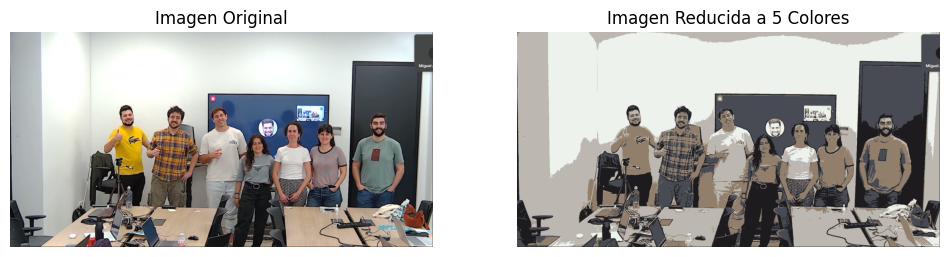

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Imagen original
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
plt.title("Imagen Original")

# Imagen con K-Means
plt.subplot(1,2,2)
plt.imshow(imagen_reducida)  # Convertir a int para matplotlib
plt.axis("off")
plt.title(f"Imagen Reducida a {k} Colores")

plt.show()

#### 7. Muestra y guarda en tu ordenador la imagen resultante

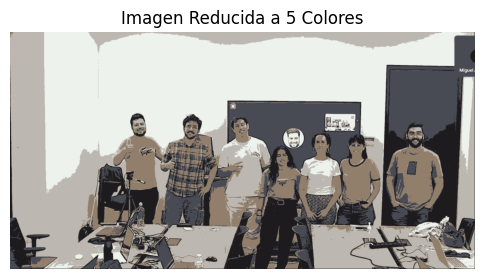

Imagen guardada en: imagen_reducida.png


In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(imagen_reducida)  # Convertir a int para visualizar
plt.axis("off")
plt.title(f"Imagen Reducida a {k} Colores")
plt.show()
# Reemplaza con la ruta y nombre que quieras
ruta_guardado = "imagen_reducida.png"

# Guardar la imagen
plt.imsave(ruta_guardado, imagen_reducida)

print(f"Imagen guardada en: {ruta_guardado}")

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def reducir_colores(imagen, num_colores=5, mostrar=True, guardar=False, ruta_guardado="imagen_reducida.png"):
    """
    Reduce los colores de una imagen usando K-Means.

    Args:
        imagen (numpy array): Imagen original (alto, ancho, 3).
        num_colores (int): Número de colores deseados en la imagen resultante.
        mostrar (bool): Si True, muestra la imagen resultante.
        guardar (bool): Si True, guarda la imagen resultante en disco.
        ruta_guardado (str): Ruta y nombre de archivo para guardar la imagen.
    
    Returns:
        imagen_reducida (numpy array): Imagen con colores reducidos.
    """
    
    # Comprobar que la imagen tenga 3 canales
    if len(imagen.shape) != 3 or imagen.shape[2] != 3:
        raise ValueError("La imagen debe tener 3 canales (RGB)")
    
    # Transformar la imagen a 2D (pixels x canales)
    alto, ancho, canales = imagen.shape
    pixels = imagen.reshape(alto * ancho, canales)
    
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=num_colores, n_init=10, random_state=42)
    labels = kmeans.fit_predict(pixels)
    colores_cluster = kmeans.cluster_centers_
    
    # Reconstruir la imagen
    pixels_reducidos = colores_cluster[labels]
    imagen_reducida = pixels_reducidos.reshape(alto, ancho, canales)
    
    # Mostrar imagen
    if mostrar:
        plt.figure(figsize=(6,6))
        plt.imshow(imagen_reducida.astype(int))
        plt.axis("off")
        plt.title(f"Imagen con {num_colores} colores")
        plt.show()
    
    # Guardar imagen
    if guardar:
        plt.imsave(ruta_guardado, imagen_reducida.astype(int))
        print(f"Imagen guardada en: {ruta_guardado}")
    
    return imagen_reducida
